<a href="https://colab.research.google.com/github/srita2003/DL_Practicals/blob/main/DL_Prac_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# 1. Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Normalize pixel values to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# 2. Build Neural Network model
model = Sequential([
    Flatten(input_shape=(28, 28)),       # Flatten 28x28 image to 784 vector
    Dense(128, activation='relu'),       # Hidden layer with 128 neurons
    Dense(64, activation='relu'),        # Hidden layer with 64 neurons
    Dense(10, activation='softmax')      # Output layer (10 classes: digits 0–9)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# 3. Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# 4. Train model
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128,
                    verbose=2)

Epoch 1/10
422/422 - 3s - 8ms/step - accuracy: 0.8980 - loss: 0.3608 - val_accuracy: 0.9627 - val_loss: 0.1405
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9580 - loss: 0.1439 - val_accuracy: 0.9725 - val_loss: 0.1011
Epoch 3/10
422/422 - 2s - 5ms/step - accuracy: 0.9706 - loss: 0.0968 - val_accuracy: 0.9740 - val_loss: 0.0915
Epoch 4/10
422/422 - 3s - 7ms/step - accuracy: 0.9780 - loss: 0.0728 - val_accuracy: 0.9743 - val_loss: 0.0818
Epoch 5/10
422/422 - 3s - 7ms/step - accuracy: 0.9830 - loss: 0.0569 - val_accuracy: 0.9782 - val_loss: 0.0764
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9868 - loss: 0.0449 - val_accuracy: 0.9775 - val_loss: 0.0768
Epoch 7/10
422/422 - 3s - 8ms/step - accuracy: 0.9889 - loss: 0.0368 - val_accuracy: 0.9778 - val_loss: 0.0753
Epoch 8/10
422/422 - 4s - 9ms/step - accuracy: 0.9912 - loss: 0.0297 - val_accuracy: 0.9767 - val_loss: 0.0885
Epoch 9/10
422/422 - 4s - 9ms/step - accuracy: 0.9933 - loss: 0.0236 - val_accuracy: 0.9778 - val_loss: 0.0801
E

In [10]:
# 5. Evaluate model on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9782
Test Loss: 0.0767


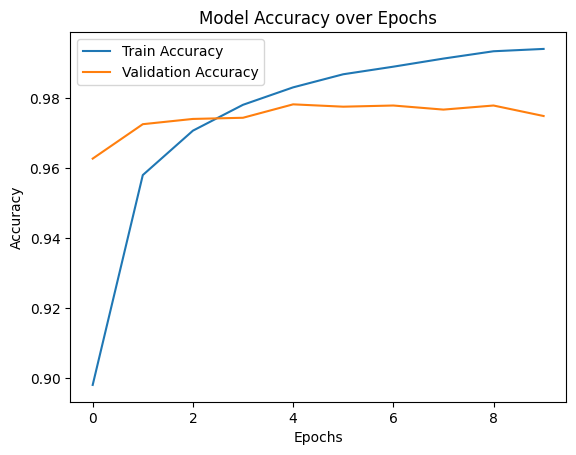

In [11]:
# 6. Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy over Epochs")
plt.show()